In [2]:
import numpy as np
from scipy.linalg import expm
from qiskit.circuit.library import *

S = expm(
    -1j
    * np.pi
    * (XGate().to_matrix() + YGate().to_matrix() + ZGate().to_matrix())
    / np.sqrt(33)
)

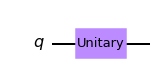

In [3]:
from qiskit.extensions.unitary import UnitaryGate
from qiskit import QuantumCircuit

S_gate = UnitaryGate(S)
qc = QuantumCircuit(1)
qc.append(S_gate, [0])
qc.draw(output="mpl")

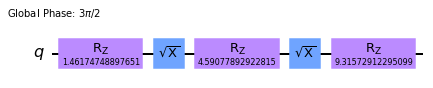

In [4]:
from qiskit.transpiler.passes import (
    BasisTranslator,
    UnrollCustomDefinitions,
    Optimize1qGates,
)
from qiskit.transpiler import PassManager
from qiskit.circuit.equivalence_library import StandardEquivalenceLibrary as _sel

pass_ = [UnrollCustomDefinitions(_sel, ["u3"]), BasisTranslator(_sel, ["rz", "sx"])]
pm = PassManager(pass_)
new_circ = pm.run(qc)
new_circ.draw(output="mpl")

In [5]:
# verify correctness
from qiskit.quantum_info.operators import Operator

Operator(new_circ).equiv(qc)

True

Easier method

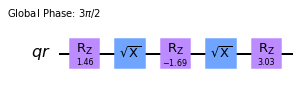

In [7]:
from qiskit.quantum_info.synthesis.one_qubit_decompose import OneQubitEulerDecomposer

decomposer = OneQubitEulerDecomposer("ZSXX")
euler_circ = decomposer(S)
euler_circ.draw(output="mpl")

In [8]:
# verify correctness
Operator(new_circ).equiv(qc)

True

Repeat more explicitly

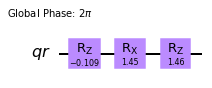

In [37]:
from qiskit.quantum_info.synthesis.one_qubit_decompose import OneQubitEulerDecomposer

decomposer = OneQubitEulerDecomposer("ZXZ")
euler_decomp = decomposer(S)
euler_decomp.draw(output="mpl")

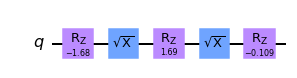

In [38]:
alpha, gamma, delta = [gate[0].params[0] for gate in euler_decomp]
new_circ2 = QuantumCircuit(1)
new_circ2.rz(alpha - np.pi / 2, 0)
new_circ2.sx(0)
new_circ2.rz(np.pi - gamma, 0)
new_circ2.sx(0)
new_circ2.rz(delta - np.pi / 2, 0)
new_circ2.draw(output="mpl")

In [39]:
# verify correctness
Operator(new_circ).equiv(qc)

True